<a href="https://colab.research.google.com/github/Guhan2348519/demo/blob/main/Guhan_519_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import nltk
import re
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from nltk import ngrams, pos_tag, FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
text="#SunPlease! Finn slammed his phone as there was a call from number +91 123-456-7890 and it was his birthday(23-May-2005)happened over the year of 1990-2005. Not another gray Tuesday! Groaning, he stalked over to the window, watching the relentless rain. No chance of exploring the hidden waterfall today. Just then, a blinding flash and a deafening CRACK! He blinked, confused. Not his room anymore. Towering trees, bathed in emerald light, surrounded him. No rain here, just the chirping of strange, colorful birds. A mischievous grin spread across his face. This wasn't dreary Kansas! He couldn't believe it! He wouldn't waste another minute moping. Adventure, not boredom, awaited!"

In [92]:
print(text)

#SunPlease! Finn slammed his phone as there was a call from number +91 123-456-7890 and it was his birthday(23-May-2005)happened over the year of 1990-2005. Not another gray Tuesday! Groaning, he stalked over to the window, watching the relentless rain. No chance of exploring the hidden waterfall today. Just then, a blinding flash and a deafening CRACK! He blinked, confused. Not his room anymore. Towering trees, bathed in emerald light, surrounded him. No rain here, just the chirping of strange, colorful birds. A mischievous grin spread across his face. This wasn't dreary Kansas! He couldn't believe it! He wouldn't waste another minute moping. Adventure, not boredom, awaited!


In [93]:
# a. Count the number of unique tokens in the text.
tokens = word_tokenize(text)
unique_tokens = set(tokens)
print(f'Number of unique tokens: {len(unique_tokens)}')


Number of unique tokens: 93


In [94]:
# b. Count the number of punctuation characters and remove punctuations.
punctuation = re.findall(r'[^\w\s]', text)
text_no_punct = re.sub(r'[^\w\s]', '', text)
print(f'Number of punctuation characters: {len(punctuation)}')
txtwithoutpunc=print(f'Text without punctuation: {text_no_punct}')



Number of punctuation characters: 37
Text without punctuation: SunPlease Finn slammed his phone as there was a call from number 91 1234567890 and it was his birthday23May2005happened over the year of 19902005 Not another gray Tuesday Groaning he stalked over to the window watching the relentless rain No chance of exploring the hidden waterfall today Just then a blinding flash and a deafening CRACK He blinked confused Not his room anymore Towering trees bathed in emerald light surrounded him No rain here just the chirping of strange colorful birds A mischievous grin spread across his face This wasnt dreary Kansas He couldnt believe it He wouldnt waste another minute moping Adventure not boredom awaited


In [95]:
# d. Remove the stopwords from the text.
filtered_words = [word for word in tokens if word.lower() not in stop_words]
print(f'Text without stopwords: {" ".join(filtered_words)}')



Text without stopwords: # SunPlease ! Finn slammed phone call number +91 123-456-7890 birthday ( 23-May-2005 ) happened year 1990-2005 . another gray Tuesday ! Groaning , stalked window , watching relentless rain . chance exploring hidden waterfall today . , blinding flash deafening CRACK ! blinked , confused . room anymore . Towering trees , bathed emerald light , surrounded . rain , chirping strange , colorful birds . mischievous grin spread across face . n't dreary Kansas ! could n't believe ! would n't waste another minute moping . Adventure , boredom , awaited !


In [96]:
# f. Determine the number of unique lemma available in the text.
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(w) for w in filtered_words]
unique_lemmas = set(lemmas)
print(f'Number of unique lemmas: {len(unique_lemmas)}')


Number of unique lemmas: 68


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
# h. Find the number of unique bigrams, trigrams and quadgrams in the corpus
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
quadgrams = list(ngrams(tokens, 4))
unique_bigrams = len(set(bigrams))
unique_trigrams = len(set(trigrams))
unique_quadgrams = len(set(quadgrams))
print(f'Unique bigrams: {unique_bigrams}')
print(f'Unique trigrams: {unique_trigrams}')
print(f'Unique quadgrams: {unique_quadgrams}')


Unique bigrams: 134
Unique trigrams: 137
Unique quadgrams: 136


In [97]:
# i. Find all dates and convert them to the DD-MM-YYYY format.
import datetime
dates = re.findall(r'\d{1,2}-[A-Za-z]+-\d{4}', text)
new_dates_format = [datetime.datetime.strptime(date, '%d-%B-%Y').strftime('%d-%m-%Y') for date in dates]
print(f'Dates converted to DD-MM-YYYY format: {new_dates_format}')


Dates converted to DD-MM-YYYY format: ['23-05-2005']


['7890', '2005', '1990', '2005']


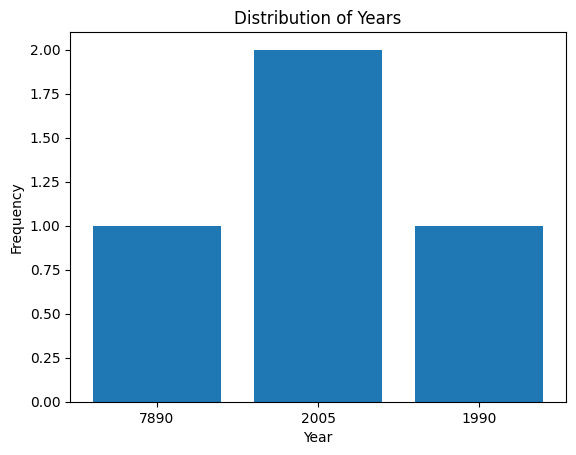

In [106]:
# j. Plot a distribution of the different values of year occurring in the text.
# Use regular expression to find 4-digit numbers
matches = re.findall(r'\b\d{4}\b', text)
# Print the matches
print(matches)
# Count occurrences of each year
year_counts = Counter(matches)
# Plot the distribution
plt.bar(year_counts.keys(), year_counts.values())
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

In [108]:
# k. Determine whether the text contains any phone numbers in it. Ensure the phone numbers are valid if any. If an invalid phone number is found, remove it from the text.
phone_numbers = re.findall(r'(\+\d{1,3}\s?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4})', text)
valid_phone_numbers = [number for number in phone_numbers if re.match(r'^(\+\d{1,3}\s?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4})', number)]
print(f'Valid phone numbers: {valid_phone_numbers}')

# Remove invalid phone numbers from the text
for invalid_phone_number in set(phone_numbers) - set(valid_phone_numbers):
    text = text.replace(invalid_phone_number, '')

# Print text with invalid phone numbers removed
print('Text with invalid phone numbers removed:')
print(text)

Valid phone numbers: ['+91 123-456-7890']
Text with invalid phone numbers removed:
#SunPlease! Finn slammed his phone as there was a call from number +91 123-456-7890 and it was his birthday(23-May-2005)happened over the year of 1990-2005. Not another gray Tuesday! Groaning, he stalked over to the window, watching the relentless rain. No chance of exploring the hidden waterfall today. Just then, a blinding flash and a deafening CRACK! He blinked, confused. Not his room anymore. Towering trees, bathed in emerald light, surrounded him. No rain here, just the chirping of strange, colorful birds. A mischievous grin spread across his face. This wasn't dreary Kansas! He couldn't believe it! He wouldn't waste another minute moping. Adventure, not boredom, awaited!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


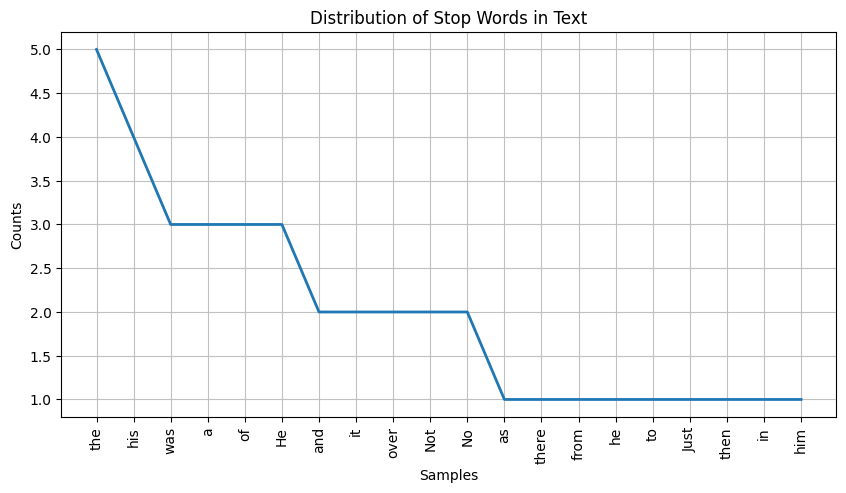

In [100]:
# c. Plot the distribution of stopwords used in the text using barplot.
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words_in_text = [word for word in tokens if word.lower() in stop_words]
stop_words_distribution = FreqDist(stop_words_in_text)
plt.figure(figsize=(10,5))
stop_words_distribution.plot(20, title='Distribution of Stop Words in Text')
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


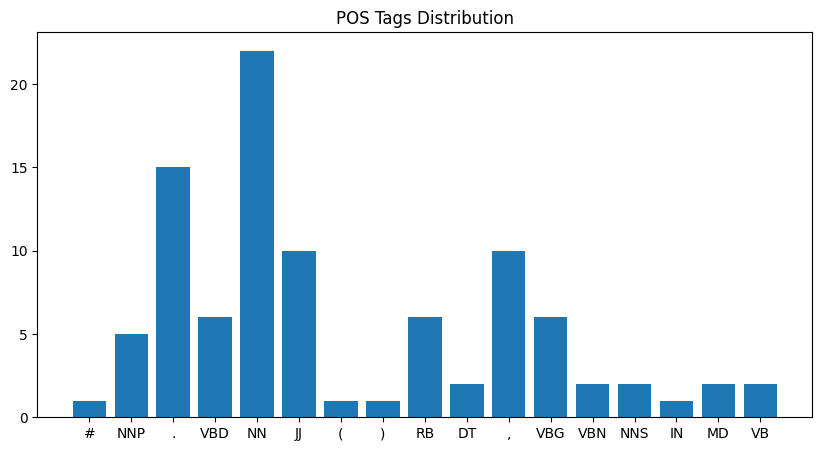

In [101]:
# e. Plot the distribution of each POS Tag using a barplot.
nltk.download('averaged_perceptron_tagger')
pos_tags = pos_tag(filtered_words)
pos_counts = Counter(tag for word, tag in pos_tags)
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('POS Tags Distribution')
plt.show()


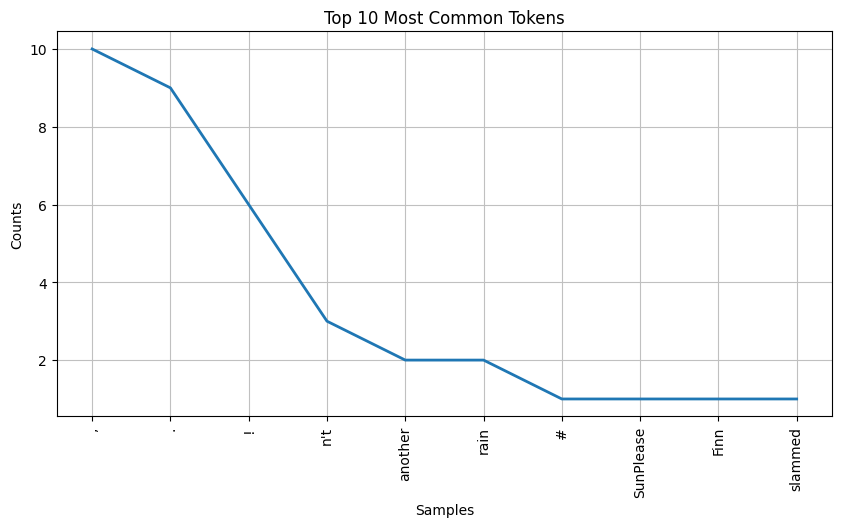

In [102]:
# g. Plot the frequency distribution of words in the text. Display only the top 10.
freq_dist = FreqDist(filtered_words)
plt.figure(figsize=(10,5))
freq_dist.plot(10, title='Top 10 Most Common Tokens')
plt.show()
